## Gathering
### Import libraries and dataset


In [1]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt


df = pd.read_csv('data_cleaned_2021.csv')

## Business Undestanding 
Data set contains Data Scientist job posting information of 2021 year:
 - job title,
 - job description,
 - company info (revenue, size, rating, HQ, foudnded, industry, sector and etc.)
 
also, dataset contains required computer skill for the job. 

We will try to understand the dataset and answer on the following questions:

1. What is the count Data Scientist open job positions based on different location, company size, company revenue and industry sectors?
2. What is the relationship of Data Scientist salary with different location, company size, company revenue and industry sectors?
3. Whar are the required Computer science skills for Data Science job positions?

## Data Understanding 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

In [3]:
df.describe()

,index,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,...,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,279.793117,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,...,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


To answer on question above, we will use columns:
- 'Rating'
- 'Location'
- 'Size'
- 'Sector',
- 'Revenue',
- 'Avg Salary(K)'
- 'Job Location',
 
and Computer skills:
- 'Python',
- 'spark',
- 'aws',
- 'excel',
- 'sql',
- 'sas',
- 'keras',
- 'pytorch',
- 'scikit',
- 'tensor',
- 'hadoop',
- 'tableau',
- 'bi',
- 'flink',
- 'mongo',
- 'google_an',
- 'job_title_sim',

## Wrangle and Clean

In interested columns, only Rating has nan values (-1), replace them with mean value

In [4]:
rating_mean = df['Rating'].mean()
df.Rating = df.Rating.apply(lambda x: rating_mean if x == -1 else x)

In [5]:
df.describe()

,index,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.687342,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,...,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,279.793117,0.566167,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,...,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,0.000000,1.900000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling

In [6]:
#Category variable
cat_list = ['Size', 'Sector', 'Revenue', 'Job Location']

In [7]:
X = df[['Size', 'Sector', 'Revenue', 'Job Location', 'Rating', 'Python', 'spark', 'aws', 
        'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 
        'mongo', 'google_an']]
y = df['Avg Salary(K)']

In [8]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [9]:
X = create_dummy_df(X, cat_list, False)

In [10]:
def lm_model(X, y, test_size=.3, rand_state=42):
    
    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression() # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model


In [11]:
#Test your function with the above dataset
test_score, train_score, lm_model = lm_model(X, y)
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.4849167101942198.  The rsquared on the test data was -2.585403019797972e+23.


In [12]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

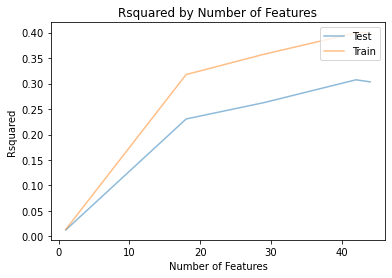

In [13]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [2000, 1000, 500, 100, 50, 30, 25]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [14]:
y_pred = lm_model.predict(X_test)
r2_score(y_test, y_pred)

0.3074665000505622

From the linear Regression model, we got poor result. So it requires further research and study to accurately predict Data scientist salary

In [15]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
35,Job Location_CA,33.157565,33.157565
31,Revenue_$25 to $50 million (USD),-21.887825,21.887825
36,Job Location_IL,19.781331,19.781331
1,Python,18.858943,18.858943
20,Sector_Biotech & Pharmaceuticals,17.761317,17.761317
18,Size_501 - 1000,-17.745713,17.745713
6,sas,16.201675,16.201675
9,tensor,16.084977,16.084977
17,Size_5001 - 10000,-15.978259,15.978259
25,Sector_Insurance,15.058739,15.058739


From the result above, its clear that job location CA has high impact on ave salary, which will be later concluded in visualization part. 

## Visualization

### Answer on stated questions

<Figure size 1440x1440 with 0 Axes>

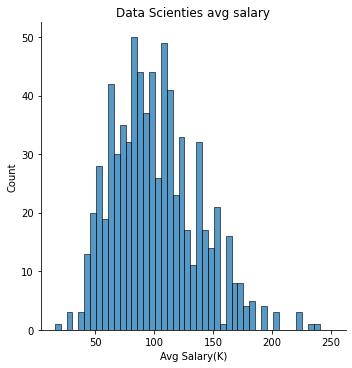

In [16]:
#%% Plot Data Science avg Salary
plt.figure(figsize=[20,20])
bins = np.arange(df['Avg Salary(K)'].min(), df['Avg Salary(K)'].max(), 5) 
sb.displot(data = df, x = 'Avg Salary(K)', bins = bins)
plt.title('Data Scienties avg salary');

In [17]:
#%% Plot Data Scientist job posting group by sector
def plot_counts(col, title_fontsize, label_font):
    plt.figure(figsize=[15,8])
    df["{}".format(col)].value_counts().plot(kind='bar')
    plt.xticks(rotation = 90)
    plt.title("Data Scientist job posting group by {}".format(col), fontsize = title_fontsize)
    plt.xlabel("{}".format(col), fontsize = label_font)
    plt.ylabel('Count', fontsize = label_font)
    plt.xticks(fontsize=label_font)
    plt.yticks(fontsize=label_font);
    

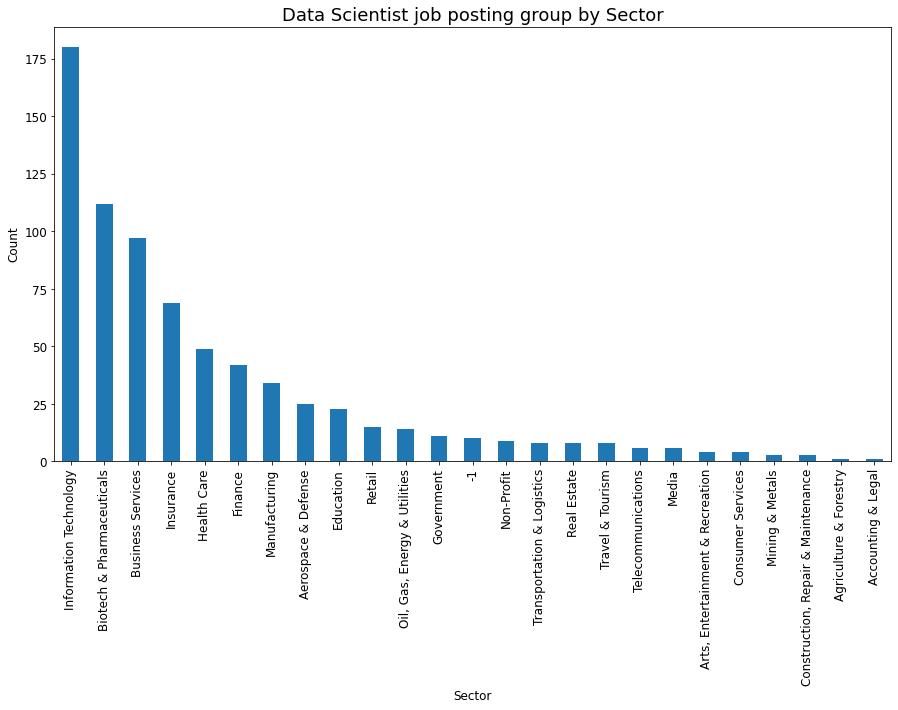

In [18]:
#%% Plot Data Scientist job posting group by sector
plot_counts('Sector', 18, 12)

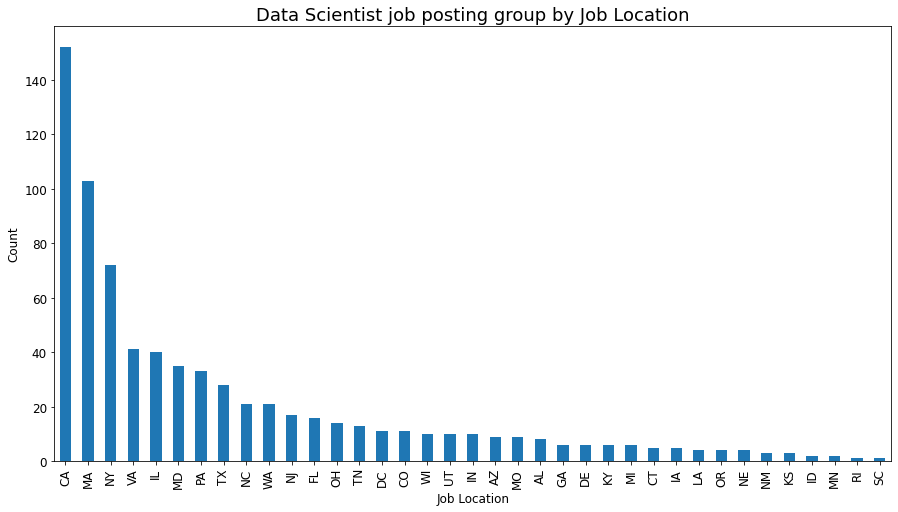

In [19]:
#Plot Data Scientist job posting grouping by job Location
plot_counts('Job Location', 18, 12)

In [20]:
def sb_count(df, col, order):
    base_color = sb.color_palette()[0]
    sb.countplot(data = df, x = '{}'.format(col), color = base_color, order = order)
    plt.xticks(rotation = 90)
    plt.title("Data Scientist job posting group by {}".format(col),fontsize=25)
    plt.xlabel("Company's Size",fontsize=18)
    plt.ylabel('Count',fontsize=18)
    plt.xticks(rotation = 75, fontsize=18)
    plt.yticks(fontsize=18);

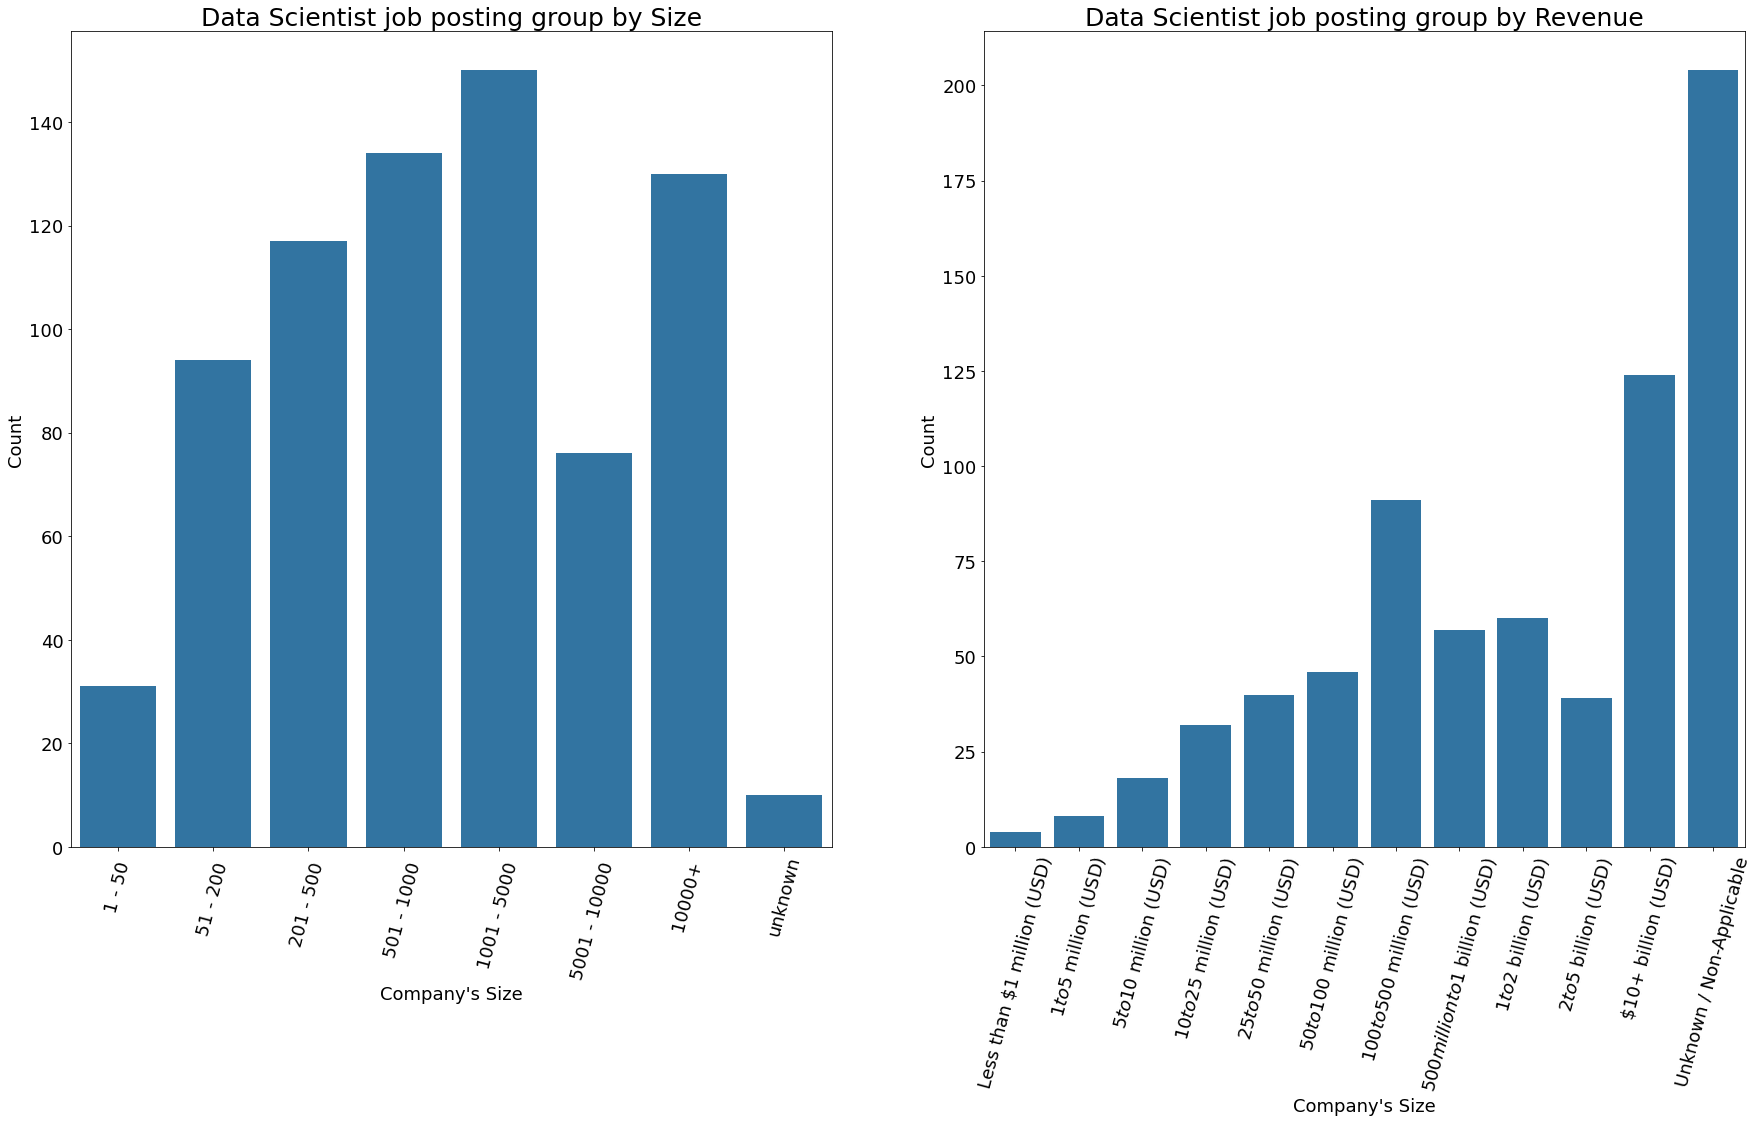

In [21]:
#%%Plot Data Science count based on company's size and revenue"
plt.figure(figsize = [30, 15])

plt.subplot(1, 2, 1)
order_s = ['1 - 50 ', '51 - 200 ', '201 - 500 ', '501 - 1000 ','1001 - 5000 ', '5001 - 10000 ', '10000+ ', 'unknown']
sb_count(df, 'Size', order_s)


plt.subplot(1, 2, 2)
order_r = ['Less than $1 million (USD)','$1 to $5 million (USD)','$5 to $10 million (USD)', '$10 to $25 million (USD)', '$25 to $50 million (USD)', '$50 to $100 million (USD)',
         '$100 to $500 million (USD)', '$500 million to $1 billion (USD)', '$1 to $2 billion (USD)', '$2 to $5 billion (USD)',
         '$10+ billion (USD)', 'Unknown / Non-Applicable']

sb_count(df, 'Revenue', order_r)


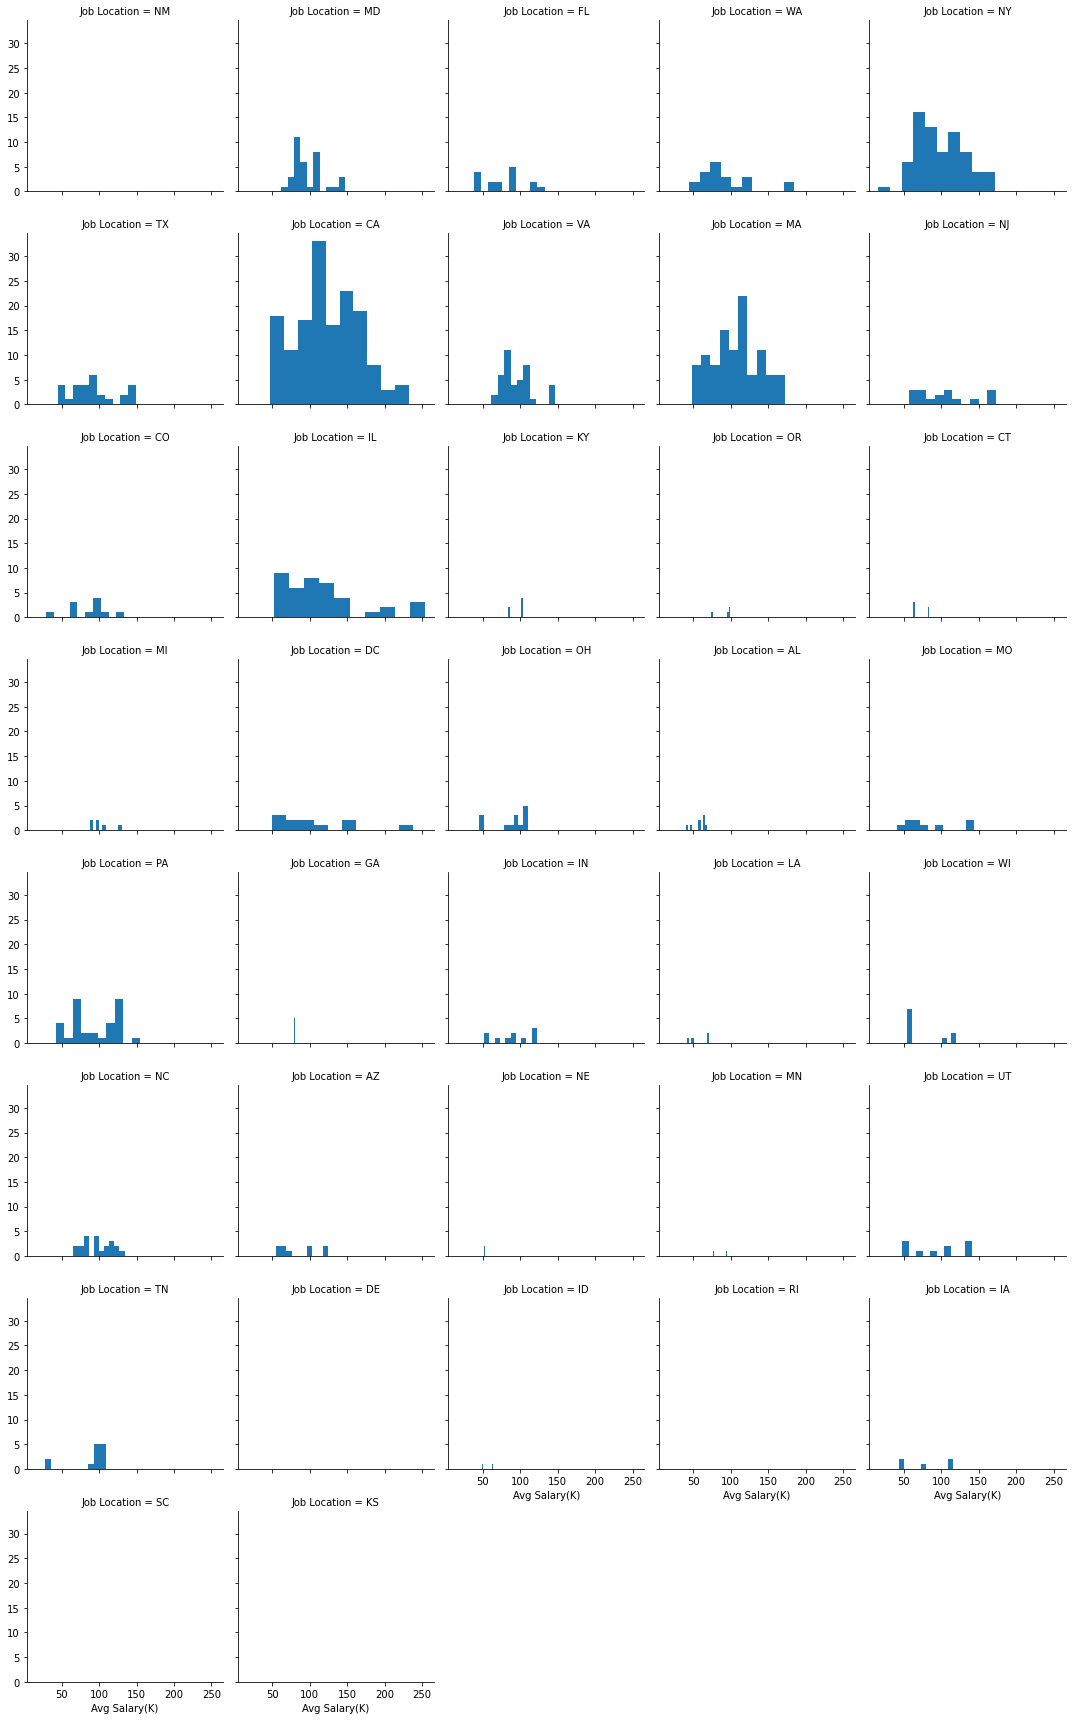

In [22]:
#%% Plot Average salaries count based on states
g = sb.FacetGrid(data = df, col = 'Job Location', col_wrap = 5);
g.map(plt.hist, 'Avg Salary(K)');

#It is not comfortable to plot this way

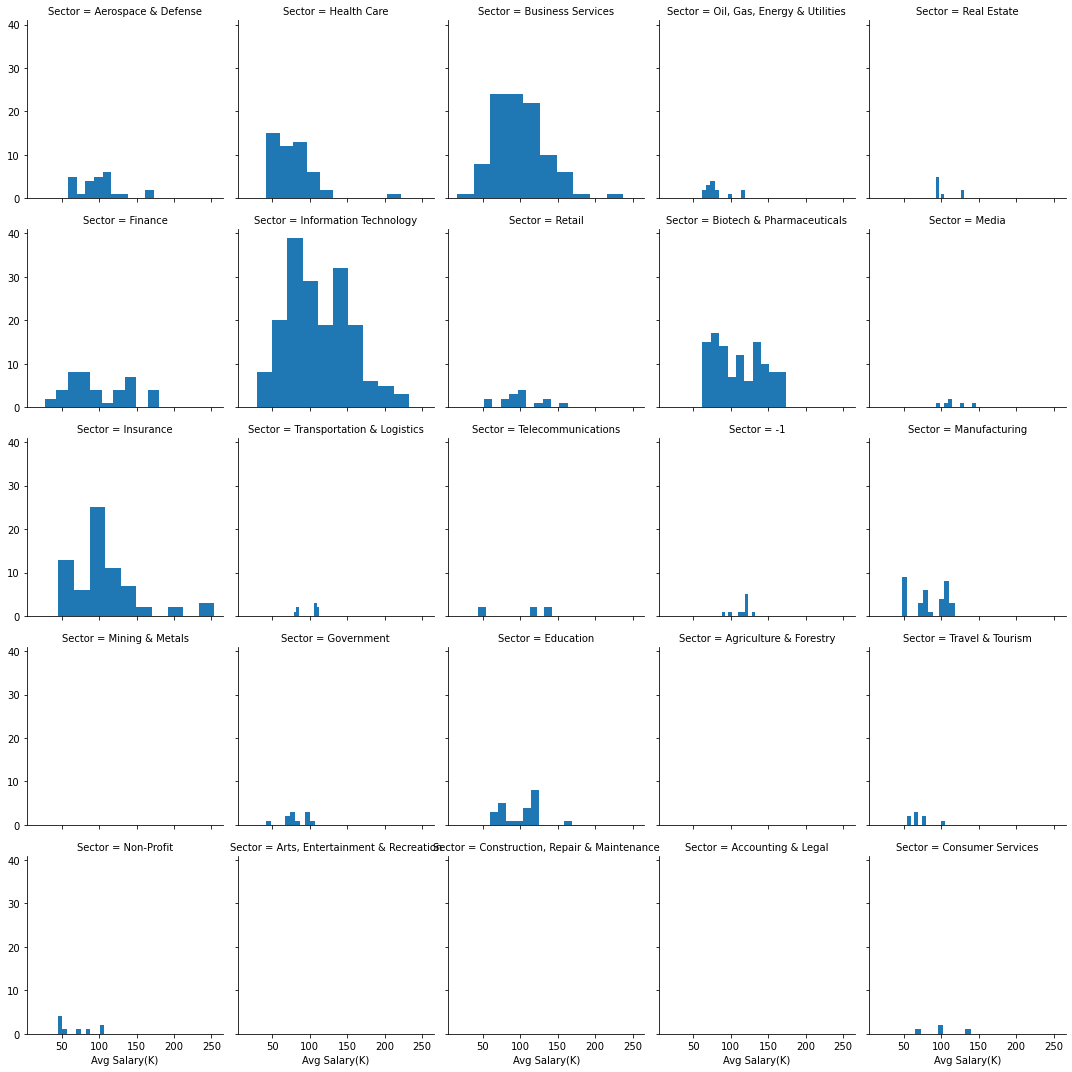

In [23]:
#%% Plot Average salaries count based on sectors
g = sb.FacetGrid(data = df, col = 'Sector', col_wrap = 5);
g.map(plt.hist, 'Avg Salary(K)');


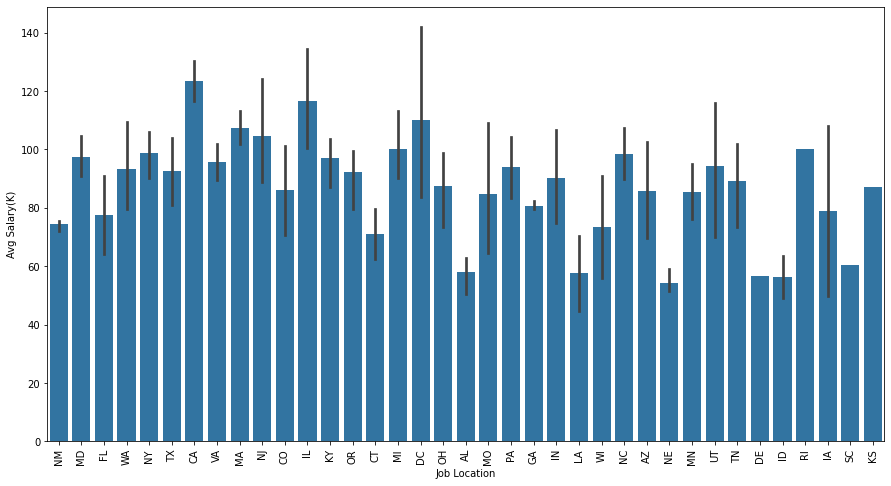

In [24]:
#%%
plt.figure(figsize = [15,8])
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'Job Location', y = 'Avg Salary(K)', color = base_color)
plt.xticks(rotation = 90);

In [25]:
def box_2plot(df, x, y, order):
    plt.figure(figsize=[15,8])
    base_color = sb.color_palette()[0]

    sb.boxplot(x="{}".format(x), y="{}".format(y), data=df, order = order)
    sb.stripplot(x="{}".format(x), y="{}".format(y), data=df, color=".3", order = order)
    plt.xticks(rotation = 60)
    plt.title('Average Salary grouped by {}'.format(x),fontsize=18)
    plt.xlabel('{}'.format(x),fontsize=12)
    plt.ylabel('{}'.format(y),fontsize=12)
    plt.xticks(rotation = 75, fontsize=12)
    plt.yticks(fontsize=12);

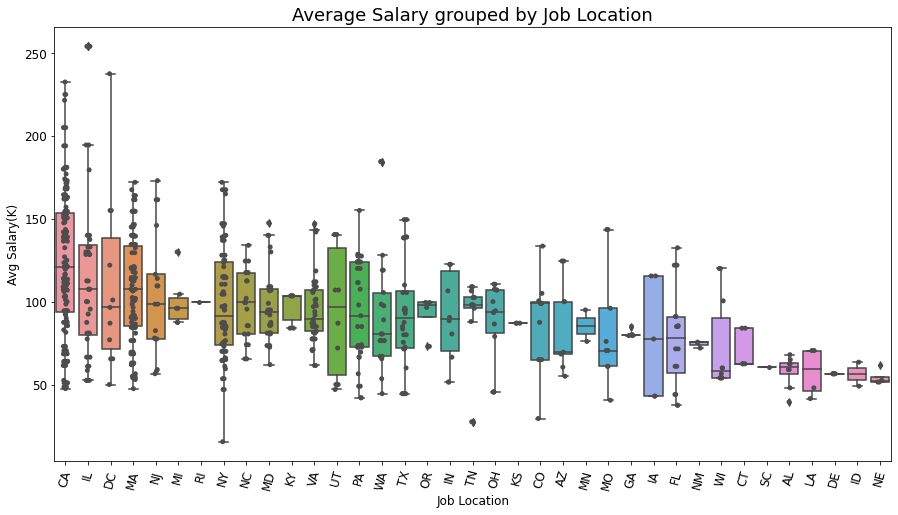

In [26]:
#%% Plot average Salary vs states
state_order = df.groupby('Job Location')['Avg Salary(K)'].mean().sort_values(ascending=False).index.tolist()
box_2plot(df, "Job Location", "Avg Salary(K)", state_order)

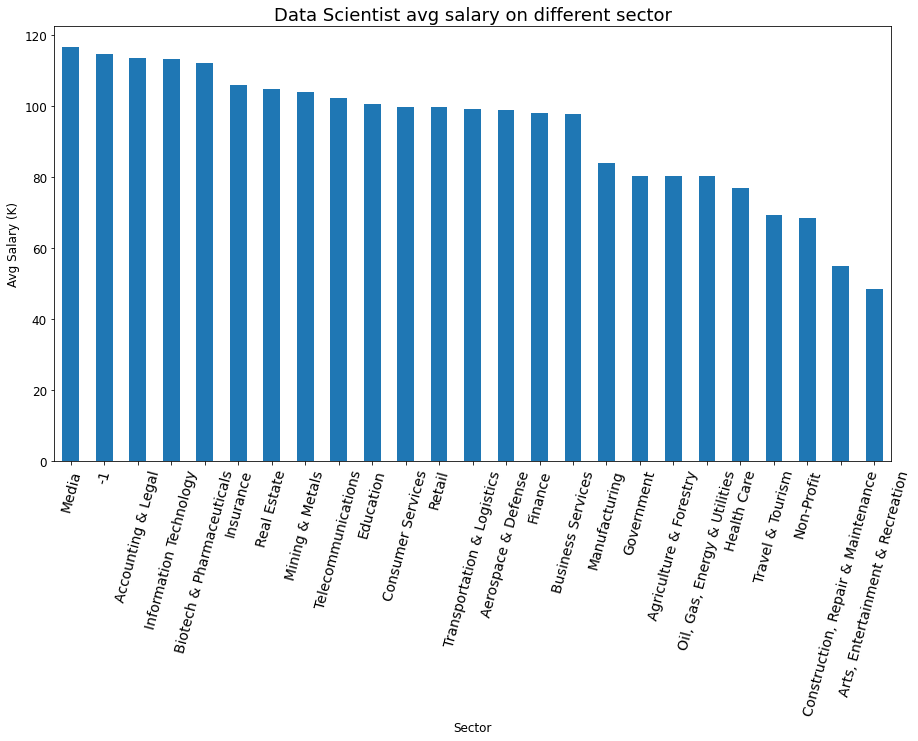

In [27]:
#%%Data Scientist avg salary on different sector
plt.figure(figsize=[15,8])
df.groupby('Sector')['Avg Salary(K)'].mean().sort_values(ascending=False).plot(kind = 'bar')
plt.title('Data Scientist avg salary on different sector',fontsize=18)
plt.xlabel('Sector',fontsize=12)
plt.ylabel('Avg Salary (K)',fontsize=12);
plt.xticks(rotation = 75, fontsize=14)
plt.yticks(fontsize=12);

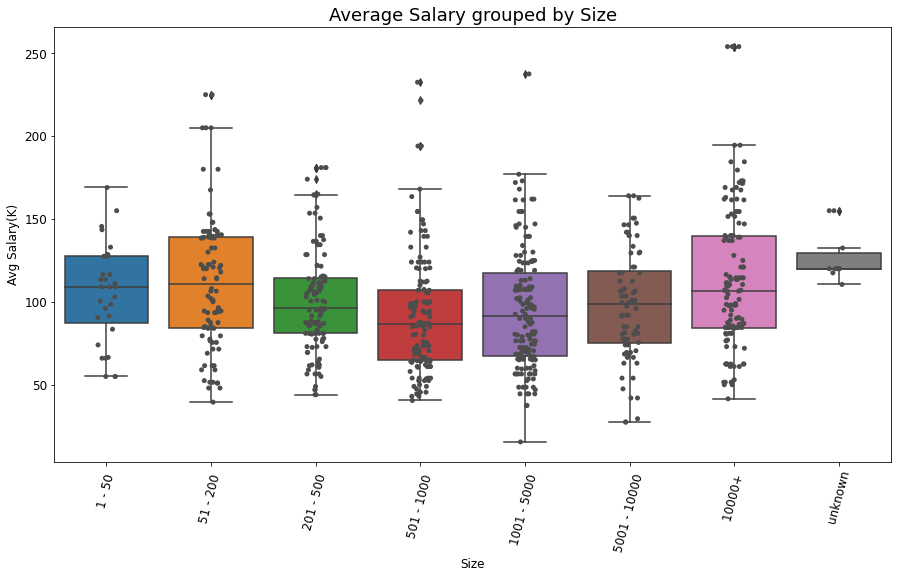

In [28]:
#%% Plot average salary vs states
order = ['1 - 50 ', '51 - 200 ', '201 - 500 ', '501 - 1000 ','1001 - 5000 ', '5001 - 10000 ', '10000+ ', 'unknown']
box_2plot(df, "Size", "Avg Salary(K)", order)



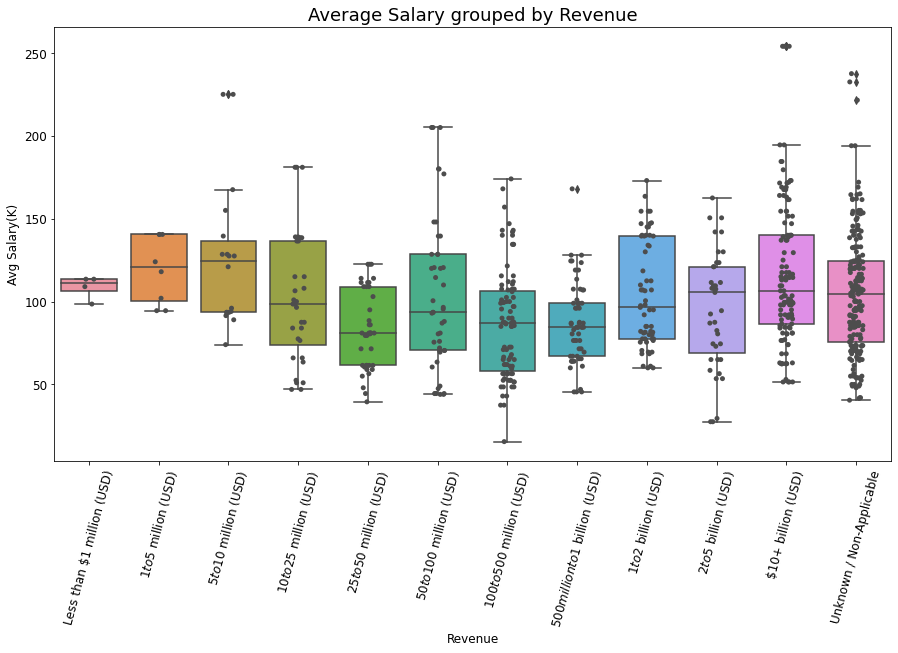

In [29]:
#%% Plot average salary vs company revenue

order = ['Less than $1 million (USD)','$1 to $5 million (USD)','$5 to $10 million (USD)', '$10 to $25 million (USD)', '$25 to $50 million (USD)', '$50 to $100 million (USD)',
         '$100 to $500 million (USD)', '$500 million to $1 billion (USD)', '$1 to $2 billion (USD)', '$2 to $5 billion (USD)',
         '$10+ billion (USD)', 'Unknown / Non-Applicable']

box_2plot(df, "Revenue", "Avg Salary(K)", order)


<Figure size 1080x576 with 0 Axes>

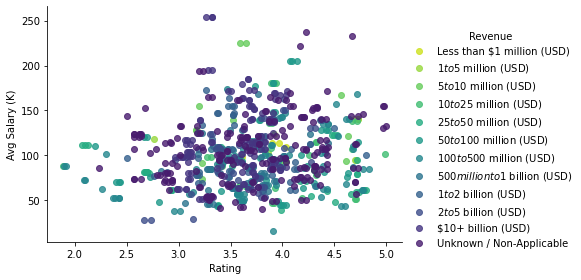

In [30]:
#%% Check company's rating vs average salary
plt.figure(figsize = [15,8])
g = sb.FacetGrid(data = df, hue = 'Revenue',height = 4, aspect = 1.5,
                hue_order = ['Less than $1 million (USD)','$1 to $5 million (USD)','$5 to $10 million (USD)', '$10 to $25 million (USD)', '$25 to $50 million (USD)', '$50 to $100 million (USD)',
                             '$100 to $500 million (USD)', '$500 million to $1 billion (USD)', '$1 to $2 billion (USD)', '$2 to $5 billion (USD)',
                             '$10+ billion (USD)', 'Unknown / Non-Applicable'],palette = 'viridis_r')
g.map(sb.regplot, 'Rating', 'Avg Salary(K)', x_jitter = 0.04, fit_reg = False)
plt.xlabel('Rating')
plt.ylabel('Avg Salary (K)');
g.add_legend();

In [31]:

#%%
cm_skills = ['Python','spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
                'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']
skills_df = df.groupby('job_title_sim')[cm_skills].sum()
skills_df.style.background_gradient(axis='columns')


,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
job_title_sim,,,,,,,,,,,,,,,,
Data scientist project manager,4,0,2,11,11,0,0,0,0,0,0,12,2,0,0,0
analyst,31,6,10,77,75,11,0,0,0,0,3,40,17,0,3,11
data analitics,5,0,0,4,4,2,0,0,0,0,0,4,2,0,0,0
data engineer,77,67,59,54,87,1,0,0,0,2,50,11,3,6,13,0
data modeler,2,1,2,4,4,0,0,0,0,0,1,0,2,0,0,0
data scientist,240,84,79,155,176,50,29,33,47,60,60,76,28,4,19,3
director,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0
machine learning engineer,18,4,6,7,13,0,0,5,7,9,4,0,0,0,0,0
na,4,5,3,9,7,0,0,0,0,0,6,5,2,0,2,0


## Evaluation 

The main findings of the code can be found at the post https://medium.com/@mmd2015medet/data-scientist-salary-study-in-2021-a469ab6ae303